# Forest Soil Characteristics Dataset

About this dataset: From Kaggle (https://www.kaggle.com/datasets/shubhamgupta012/forest-soil-characteristics-dataset)

"This dataset provides a comprehensive collection of forest soil characteristics, including various parameters and measurements. It contains data from different sites, each identified by a unique site code.

This dataset serves as a valuable resource for researchers, ecologists, and environmental scientists interested in studying forest soil characteristics and their impact on ecosystem dynamics. It can be used for various purposes, such as analyzing nutrient cycling, evaluating soil quality, and understanding the effects of land use changes on soil properties. The dataset provides a rich source of information that can contribute to a better understanding of forest ecosystems and support evidence-based decision-making in forestry and land management practices." (Kaggle)

### Sample Descriptive Variables
- HouseID
- REP#: replicate number
- CoreID: core identification
- Depth: depth range
  - soil depth (cm)
- LU_Current: current land use
- LU_Previous: previous land use
- Yr_Built: year built
- Lawn Age:
- CoarseVeg: coarse vegetation (i.e. branches, twigs, leaves, etc.)
- StructDen [StructDensity]: structural density
  - The ratio of the total ground floor area of a building to the total land area of the lot.
- BD: bulk density
  - The standard measure of soil density is bulk density, defined as the proportion of the weight of a soil relative to its volume, typically expressed as g/cm3 of soil. Compacted soils exhibit increased bulk density. Affects root and plant growth.
  - Info about BD: https://stormwater.pca.state.mn.us/index.php?title=Soil_health_indicator_sheet_-_Soil_compaction_(bulk_density)#:~:text=Bulk%20densities%20in%20undisturbed%20soils,soils%20exhibit%20increased%20bulk%20density.
- Soil percents: (the combination of Sand, Clay and Silt creates Loam soil, which is desirable for crops)
  - Sand_Perc: percentage of sand
  - Clay_Perc: percentage of clay
  - Silt_Perc: percentage of silt
  - https://geopard.tech/blog/soil-types-how-to-make-the-most-of/

### Microbial Variables

- N_Perc: nitrogen percentage
- C_Perc: carbon percentage
- C_N [C_N_Perc]: carbon to nitrogen ratio
- N_gm2: nitrogen content in grams per square meter
- C_gm2: carbon content in grams per square meter
- MB Carbon [MB_C]: microbial biomass carbon
  - https://www.soilquality.org.au/factsheets/microbial-biomass-carbon-nsw
- MBN [MB_N]: microbial biomass nitrogen
- Respiration: bacterial respiration
  - "When water fills more than 80 percent of the pore space, soil respiration reduces to a minimum level and most aerobic  micro-organisms begin to use nitrate (NO3) instead of oxygen, resulting in loss of nitrogen as gases (N2 and nitrogen oxides), emission of potent greenhouse gases, reduction in yields, and an increased need for nitrogen (N) fertilizer, which increases cost." (https://www.nrcs.usda.gov/sites/default/files/2022-10/Soil%20Respiration.pdf) 
- Initial NO3 (+NO2) [Initial Nitrates]: initial nitrate and nitrite content; useable nitrogen for the plants
- Initial NH4: initial ammonium content; usuable nitrogen for the plants (not as good as NO3 and +NO2)
- Net N Min: net nitrogen mineralization
  - Mineralization is the process by which organic nitrogen is converted to plant available inorganic forms. It is regarded as a potential indicator to comprehend the soil's response to biological change
- Net Nitr: net nitrification
  - Nitrification is where most nitrogen is leached into the soil and can contaminate ground water


#### Missing columns that would be nice to have:
- Temperature of soil
- pH of soil
- soil moisture

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Read CSV
soil_df = pd.read_csv("datasets\Forest Soil Characteristics.csv")
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)
soil_df.tail()

,Site,HouseID,REP#,CoreID,Depth,LU_Current,LU_Previous,Yr_Built,Lawn Age,CoarseVeg,StructDen,BD,N_Perc,C_Perc,C_N,N_gm2,C_gm2,Sand_Perc,Clay_Perc,Silt_Perc,MB Carbon,Respiration,Initial NO3 (+NO2),Initial NH4,MBN,Net N Min,Net Nitr
323,House30,30.0,2,30.2,10to30,Residential,Forest,1952.0,55.0,4+,1,1.245,0.071,1.967,27.698,176.830,4897.833,28.375,28.750,42.875,155.68,4.005,8.548,1.002,13.376,0.306,0.374
324,House30,30.0,1,30.1,30to70,Residential,Forest,1952.0,55.0,4+,1,1.297,0.040,0.532,13.465,204.868,2758.625,37.719,25.013,37.269,88.59,3.170,1.142,0.571,1.641,-0.029,-0.001
325,House30,30.0,2,30.2,30to70,Residential,Forest,1952.0,55.0,4+,1,1.420,0.035,0.427,12.067,201.191,2427.722,33.875,29.500,36.625,113.83,2.449,1.640,0.264,2.428,0.017,0.017
326,House30,30.0,1,30.1,70to100,Residential,Forest,1952.0,55.0,4+,1,1.662,0.047,0.579,12.201,236.756,2888.764,32.324,20.766,46.910,149.03,3.608,1.084,0.568,2.464,0.005,0.033
327,House30,30.0,2,30.2,70to100,Residential,Forest,1952.0,55.0,4+,1,0.935,0.049,0.585,11.872,138.267,1641.546,33.342,21.261,45.398,94.6,2.716,1.356,0.261,1.176,0.074,0.074


In [96]:
#Rename some columns
soil_df.rename(columns = {"MB Carbon": "MB_C", "MBN": "MB_N", "C_N": "C_N_Perc", "Initial NO3 (+NO2)": "Initial Nitrates", 
                          }, inplace = True)

#Remove comma from MB Carbon and convert to a float
import re
soil_df["MB_C"] = soil_df["MB_C"].replace(",", "", regex = True)
soil_df["MB_C"]
soil_df["MB_C"] = soil_df["MB_C"].astype(float)

#Convert CoarseVeg to float
soil_df["CoarseVeg"] = soil_df["CoarseVeg"].replace("2+", 2, regex = True).replace("4+", 4, regex = True)
soil_df["CoarseVeg"].value_counts()

soil_df["StructDen"] = soil_df["StructDen"].replace("2+", "2", regex = True)
soil_df["StructDen"].value_counts()
soil_df["StructDen"] = soil_df["StructDen"].astype(float)

soil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Site              328 non-null    object 
 1   HouseID           264 non-null    float64
 2   REP#              328 non-null    int64  
 3   CoreID            328 non-null    object 
 4   Depth             328 non-null    object 
 5   LU_Current        328 non-null    object 
 6   LU_Previous       264 non-null    object 
 7   Yr_Built          264 non-null    float64
 8   Lawn Age          264 non-null    float64
 9   CoarseVeg         264 non-null    float64
 10  StructDen         264 non-null    float64
 11  BD                322 non-null    float64
 12  N_Perc            320 non-null    float64
 13  C_Perc            320 non-null    float64
 14  C_N_Perc          291 non-null    float64
 15  N_gm2             321 non-null    float64
 16  C_gm2             321 non-null    float64
 1

In [100]:
soil_df.columns
soil_df = soil_df.reindex(columns = ['Site', 'HouseID', 'REP#', 'CoreID', 'Depth', 'LU_Current', 
                                       'LU_Previous', 'Yr_Built', 'Lawn Age', 'CoarseVeg', 'StructDen', 'BD', 
                                       'Sand_Perc','Clay_Perc', 'Silt_Perc', 'Respiration', 'C_Perc',  
                                        'N_Perc', 'C_N_Perc', 'MB_C', 'MB_N', 'C_gm2', 'N_gm2', 'Initial Nitrates',
                                       'Initial NH4', 'Net N Min', 'Net Nitr'])
soil_df.tail()

,Site,HouseID,REP#,CoreID,Depth,LU_Current,LU_Previous,Yr_Built,Lawn Age,CoarseVeg,StructDen,BD,Sand_Perc,Clay_Perc,Silt_Perc,Respiration,C_Perc,N_Perc,C_N_Perc,MB_C,MB_N,C_gm2,N_gm2,Initial Nitrates,Initial NH4,Net N Min,Net Nitr
323,House30,30.0,2,30.2,10to30,Residential,Forest,1952.0,55.0,4.0,1.0,1.245,28.375,28.750,42.875,4.005,1.967,0.071,27.698,155.68,13.376,4897.833,176.830,8.548,1.002,0.306,0.374
324,House30,30.0,1,30.1,30to70,Residential,Forest,1952.0,55.0,4.0,1.0,1.297,37.719,25.013,37.269,3.170,0.532,0.040,13.465,88.59,1.641,2758.625,204.868,1.142,0.571,-0.029,-0.001
325,House30,30.0,2,30.2,30to70,Residential,Forest,1952.0,55.0,4.0,1.0,1.420,33.875,29.500,36.625,2.449,0.427,0.035,12.067,113.83,2.428,2427.722,201.191,1.640,0.264,0.017,0.017
326,House30,30.0,1,30.1,70to100,Residential,Forest,1952.0,55.0,4.0,1.0,1.662,32.324,20.766,46.910,3.608,0.579,0.047,12.201,149.03,2.464,2888.764,236.756,1.084,0.568,0.005,0.033
327,House30,30.0,2,30.2,70to100,Residential,Forest,1952.0,55.0,4.0,1.0,0.935,33.342,21.261,45.398,2.716,0.585,0.049,11.872,94.60,1.176,1641.546,138.267,1.356,0.261,0.074,0.074


## EDA and Cleaning

In [27]:
soil_df.duplicated().sum()

0

In [28]:
soil_df.isnull().mean()*100

Site                 0.000000
HouseID             19.512195
REP#                 0.000000
CoreID               0.000000
Depth                0.000000
StructDensity       19.512195
LU_Current           0.000000
LU_Previous         19.512195
Yr_Built            19.512195
Lawn Age            19.512195
BD                   1.829268
CoarseVeg           19.512195
Sand_Perc           14.024390
Clay_Perc           14.024390
Silt_Perc           14.024390
Respiration          2.439024
C_Perc               2.439024
N_Perc               2.439024
C_N_Perc            11.280488
MB_C                 2.439024
MB_N                 2.743902
C_gm2                2.134146
N_gm2                2.134146
Initial Nitrates     2.439024
Initial NH4          2.439024
Net N Min            2.743902
Net Nitr             2.743902
dtype: float64

In [7]:
soil_df.shape

(328, 27)

In [6]:
print(f"Previous Land Use: {soil_df['LU_Previous'].unique()}")
print(f"Current Land Use: {soil_df['LU_Current'].unique()}")

Previous Land Use: [nan 'Ag' 'Forest']
Current Land Use: ['Forest' 'Residential']


In [35]:
soil_df['StructDensity'].unique()

array([nan, '1', '2+'], dtype=object)

In [60]:
#Finding percent missing
for col in soil_df:
    pct_missing = soil_df[col].isnull().mean().round(6)*100
    if pct_missing > 0:
        print(col, "-", pct_missing)

HouseID - 19.5122
LU_Previous - 19.5122
Yr_Built - 19.5122
Lawn Age - 19.5122
CoarseVeg - 19.5122
StructDen - 19.5122
BD - 1.8293
N_Perc - 2.439
C_Perc - 2.439
C_N - 11.2805
N_gm2 - 2.1341
C_gm2 - 2.1341
Sand_Perc - 14.0244
Clay_Perc - 14.0244
Silt_Perc - 14.0244
MB Carbon - 2.439
Respiration - 2.439
Initial NO3 (+NO2) - 2.439
Initial NH4 - 2.439
MBN - 2.7439
Net N Min - 2.7439
Net Nitr - 2.7439


In [43]:
#Location stats
#agg = [['count', 'mean', 'std', 'min', '50%', 'max']]
soil_df[['REP#','Yr_Built', 'Lawn Age', 'BD', 'Sand_Perc','Clay_Perc', 'Silt_Perc']].agg([
    'count', 'mean', 'std', 'min', 'median', 'max'])

,REP#,Yr_Built,Lawn Age,BD,Sand_Perc,Clay_Perc,Silt_Perc
count,328.000000,264.000000,264.000000,322.000000,282.000000,282.000000,282.000000
mean,1.615854,1972.181818,34.818182,1.102003,43.047330,23.550691,33.403415
std,0.604766,18.069498,18.069498,0.211488,15.995809,9.994355,10.839772
min,1.000000,1920.000000,5.000000,0.493000,7.125000,1.251000,5.853000
median,2.000000,1968.000000,39.000000,1.134500,41.522000,22.642000,34.155000
max,3.000000,2002.000000,87.000000,1.718000,89.489000,54.041000,66.100000


In [38]:
#Microbe stats
soil_df[['Respiration', 'C_Perc', 'N_Perc', 'C_N_Perc', 'MB_C', 'MB_N', 'C_gm2', 'N_gm2', 'Initial Nitrates',
         'Initial NH4', 'Net N Min', 'Net Nitr']].describe()

,Respiration,C_Perc,N_Perc,C_N_Perc,MB_C,MB_N,C_gm2,N_gm2,Initial Nitrates,Initial NH4,Net N Min,Net Nitr
count,320.000000,320.000000,320.000000,291.000000,320.000000,319.000000,321.000000,321.000000,320.000000,320.000000,319.000000,319.000000
mean,5.606775,1.059263,0.078947,12.112962,199.367555,28.089273,1404.591776,111.340785,5.033394,2.669500,0.240232,0.204881
std,4.729636,1.160559,0.078247,4.780619,197.314421,38.545303,1422.834436,91.622289,8.040060,4.392406,0.709831,0.474282
min,0.925000,0.000000,0.000000,4.844000,39.851933,0.488000,0.000000,0.000000,0.227000,0.201000,-0.592000,-0.575000
25%,2.823750,0.192000,0.021000,9.186500,80.512500,1.863500,282.192000,0.000000,0.265750,0.586750,-0.021500,0.000000
50%,3.687500,0.522500,0.045500,11.432000,114.567287,8.474000,1171.990000,116.667000,1.379500,1.083000,0.043000,0.026000
75%,5.846250,1.765750,0.128000,13.287000,226.247500,38.446500,2160.853000,176.739000,6.869500,2.592000,0.301000,0.201500
max,30.720000,4.919000,0.333000,41.996000,1303.480000,174.977000,11306.278000,508.428000,59.750000,34.928000,9.419000,4.907000


- Year between 1920 and 2002, mean 1972
  - Lawn Age between 87 (Yr_Built = 1920) and 5 (Yr_Built = 2002) years, with average of 35 years
- Average BD is 1.10, but what is it like in the different soil types?
- Land Use: 
  - Previous Land Use: Agriculture, Forest, or missing
  - Current Land Use: Forest, Residental
- Soils consist of higher sand content than clay or silt

In [47]:
#looking at metrics for soil samples
soil_type = soil_df.groupby("CoreID", dropna = True)[
    "Clay_Perc", "Sand_Perc", "Silt_Perc", "Respiration", "Initial Nitrates", "Initial NH4"].mean()
soil_type.head(10)

C:\Users\omdel\AppData\Local\Temp\ipykernel_3628\736565670.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  soil_type = soil_df.groupby("CoreID", dropna = True)[


,Clay_Perc,Sand_Perc,Silt_Perc,Respiration,Initial Nitrates,Initial NH4
CoreID,,,,,,
1.1,25.702500,47.964000,26.333500,8.670500,1.055250,1.645750
1.2,29.105333,49.254667,21.640667,9.762500,1.785500,1.538500
10.1,20.745000,37.766000,41.490000,17.800000,32.684000,1.979000
10.2,35.158333,19.019667,45.821667,10.949750,9.947000,1.575500
10.3,32.000000,20.337667,47.662333,4.907000,4.033333,1.175667
11.1,26.685000,27.726750,45.587750,3.099250,6.291000,0.528750
11.2,33.138000,19.907000,46.955000,2.891667,2.794000,0.713000
12.1,32.028750,27.088750,40.882250,7.236250,5.394750,1.774500
12.2,35.854667,25.166000,38.979333,5.371000,10.316500,0.651750


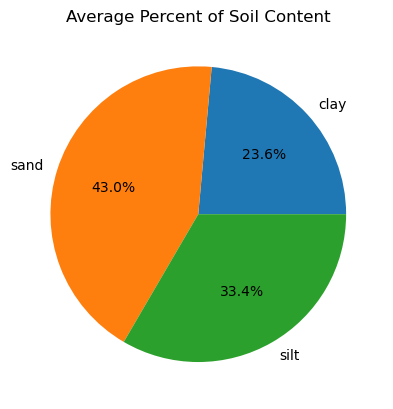

In [48]:
#percent of soil materials within samples
soil_types_chart = pd.DataFrame({
    "clay": soil_df["Clay_Perc"], "sand": soil_df["Sand_Perc"], "silt": soil_df["Silt_Perc"]}).mean()
soil_labels = ["clay", "sand", "silt"]

plt.pie(soil_types_chart, labels = soil_labels, autopct = '%1.1f%%')
plt.title("Average Percent of Soil Content")
plt.show()

In [50]:
depth_soil_mean = soil_df.groupby("Depth")["BD", "MB_C", "MB_N", "C_N_Perc", "Sand_Perc", "Clay_Perc", "Silt_Perc", 
                                     "Respiration", "Initial Nitrates", "Initial NH4", 
                                     "Net N Min", "Net Nitr"].mean()

depth_soil_mean

C:\Users\omdel\AppData\Local\Temp\ipykernel_3628\257797628.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  depth_soil_mean = soil_df.groupby("Depth")["BD", "MB_C", "MB_N", "C_N_Perc", "Sand_Perc", "Clay_Perc", "Silt_Perc",


,BD,MB_C,MB_N,C_N_Perc,Sand_Perc,Clay_Perc,Silt_Perc,Respiration,Initial Nitrates,Initial NH4,Net N Min,Net Nitr
Depth,,,,,,,,,,,,
0to10,0.851817,426.802860,84.858148,14.057024,41.467071,17.839048,40.686786,10.803049,12.832765,4.451568,0.794000,0.578469
10to30,1.108085,163.832674,17.877444,13.658062,38.428341,23.774573,37.797061,4.557432,3.634741,3.329160,0.117654,0.190123
30to70,1.222160,96.911007,4.470012,10.668662,43.190815,26.246494,30.566383,3.317074,1.832506,1.569901,-0.000198,0.022173
70to100,1.235558,105.277243,3.642421,8.822444,48.677273,23.591870,27.736130,3.653065,1.667338,1.257649,0.036921,0.017171


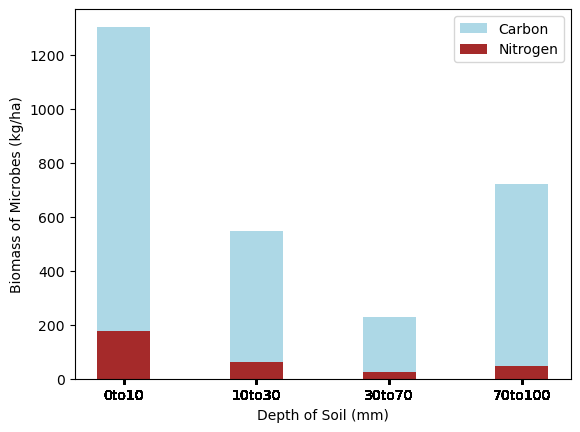

In [51]:
x = soil_df["Depth"]
y1 = soil_df["MB_C"]
y2 = soil_df["MB_N"]
width = 0.4
  
# plot data in grouped manner of bar type
plt.bar(x, y1, width, color='lightblue')
plt.bar(x, y2, width, color='brown')
plt.xticks(x)
plt.xlabel("Depth of Soil (mm)")
plt.ylabel("Biomass of Microbes (kg/ha)")
plt.legend(["Carbon", "Nitrogen"], loc = "upper right")
plt.show()

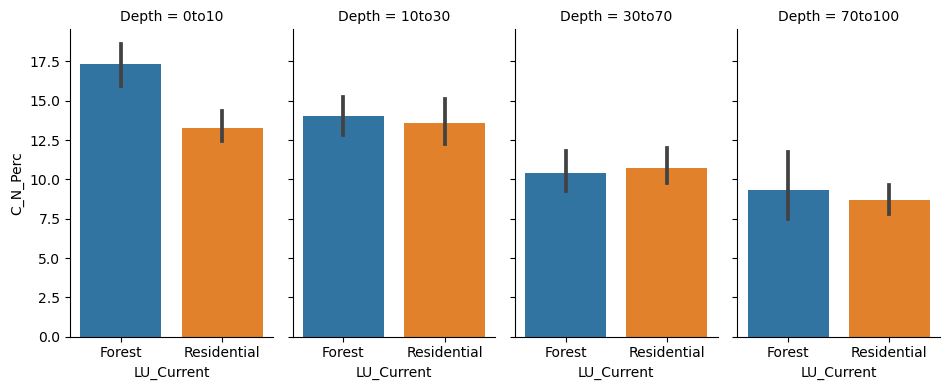

In [55]:
#Plot Microbe Biomass of Nitrogen only to see closer
#sns.catplot(x = "Depth", y = "MB Nitrogen", kind = "box", data = soil_df)

nitrogen_only = sns.catplot(
    data=soil_df, x="LU_Current", y="C_N_Perc", col="Depth",
    kind="bar", height=4, aspect=0.6,
)

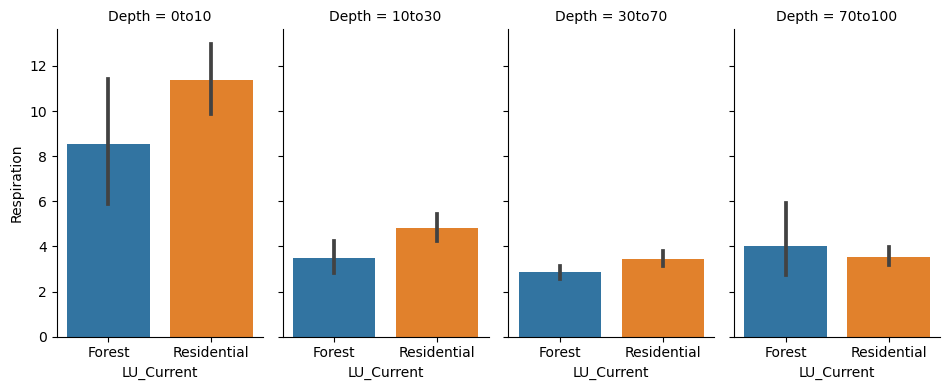

In [57]:
#Carbon Only
carbon_only = sns.catplot(
    data=soil_df, x="LU_Current", y="Respiration", col="Depth",
    kind="bar", height=4, aspect=0.6,
)

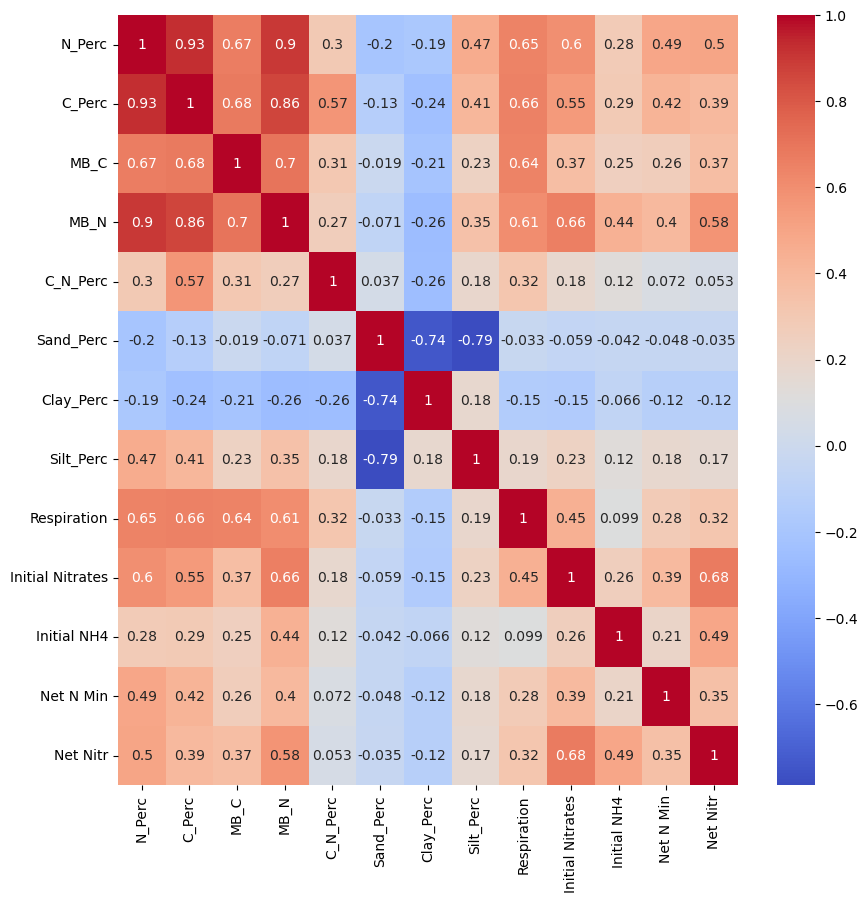

In [20]:
nitrogen_fixing = soil_df[["N_Perc","C_Perc","MB_C", "MB_N", "C_N_Perc","Sand_Perc", "Clay_Perc", "Silt_Perc", 
                                     "Respiration", "Initial Nitrates", "Initial NH4", 
                                     "Net N Min", "Net Nitr"]]

corr_heatmap = nitrogen_fixing.corr()
fig, ax = plt.subplots(figsize = (10,10))

fig = sns.heatmap(corr_heatmap, ax = ax,
                   xticklabels = corr_heatmap.columns.values,
                   yticklabels = corr_heatmap.columns.values,
                  cmap = "coolwarm",
                  annot = True
                  )


In [42]:
#Correlation values of unique pairs only

#This np.triu method retains the upper triangular values of correlation matrix and makes the lower triangular values Null
upper_corr_mat = corr_heatmap.where(np.triu(np.ones(corr_heatmap.shape), k=1).astype(bool))
  
#Converts to 1-D series, drop Null values, drop duplicated values, and sort values
unique_corr_pairs = upper_corr_mat.unstack().dropna().drop_duplicates().sort_values(ascending = False)
print(unique_corr_pairs)


C_Perc            N_Perc              0.926277
MB_N              N_Perc              0.899719
                  C_Perc              0.860716
                  MB_C                0.704507
MB_C              C_Perc              0.679785
Net Nitr          Initial Nitrates    0.678402
MB_C              N_Perc              0.668892
Initial Nitrates  MB_N                0.664225
Respiration       C_Perc              0.656468
                  N_Perc              0.645711
                  MB_C                0.644191
                  MB_N                0.605666
Initial Nitrates  N_Perc              0.600358
Net Nitr          MB_N                0.576963
C_N_Perc          C_Perc              0.570620
Initial Nitrates  C_Perc              0.547466
Net Nitr          N_Perc              0.500815
                  Initial NH4         0.494653
Net N Min         N_Perc              0.492803
Silt_Perc         N_Perc              0.468700
Initial Nitrates  Respiration         0.445546
Initial NH4  

In [54]:
#Positive Correlated values
correlated_values_df = pd.DataFrame(unique_corr_pairs)
correlated_values_df.head(17)

0
C_Perc           N_Perc            0.926277
MB_N             N_Perc            0.899719
                 C_Perc            0.860716
                 MB_C              0.704507
MB_C             C_Perc            0.679785
Net Nitr         Initial Nitrates  0.678402
MB_C             N_Perc            0.668892
Initial Nitrates MB_N              0.664225
Respiration      C_Perc            0.656468
                 N_Perc            0.645711
                 MB_C              0.644191
                 MB_N              0.605666
Initial Nitrates N_Perc            0.600358
Net Nitr         MB_N              0.576963
C_N_Perc         C_Perc            0.570620
Initial Nitrates C_Perc            0.547466
Net Nitr         N_Perc            0.500815

In [56]:
#Negative Correlated Values
correlated_values_df.tail(2)

,,0
Clay_Perc,Sand_Perc,-0.744992
Silt_Perc,Sand_Perc,-0.788711
